# Automatic Covid-19 Diagnoses in X-ray Images   
## With a CNN VGG16 Network

Covid-19 x-ray images: [Dataset1](https://www.kaggle.com/andrewmvd/convid19-x-rays#xrays.csv) [Dataset2](https://www.kaggle.com/bachrr/covid-chest-xray)  

In [446]:
!pip install imutils #add on tool for OpenCV for image processing 

In [447]:
# utility packages
from imutils import paths
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



## Data preparation

In [448]:
dataset_path = './dataset'
input_path ='/kaggle/input' 

In [449]:
# Prep metadata csv from the covid-19 dataset
# construct the path to our data
covid_dataset_path = '../input/covid-chest-xray' #dataset with covid19 and other resp. illness
covid_dataset_path2 = '../input/convid19-x-rays'#

#csv_covid_path = os.path.sep.join([covid_dataset_path, "metadata.csv"])
#meta_df = pd.read_csv(csv_covid_path)
#xray_df = pd.read_csv(os.path.sep.join([covid_dataset_path2, "xrays.csv"]))

In [450]:
# get lists of data
covid_dataset_path3 = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/'
train_neg = os.listdir(covid_dataset_path3  + "train/NORMAL/")
train_pos = os.listdir(covid_dataset_path3 + "train/PNEUMONIA/")
test_neg = os.listdir(covid_dataset_path3  + "test/NORMAL/")
test_pos = os.listdir(covid_dataset_path3  + "test/PNEUMONIA/")

In [451]:
def dataframe(filenames, classes):
    return pd.DataFrame({'Filename':filenames, 'Class':[classes]*len(filenames)})

train_neg_df = dataframe(train_neg, 'negative')
train_pos_df = dataframe(train_pos, 'positive')
test_neg_df = dataframe(test_neg, 'negative')
test_pos_df = dataframe(test_pos, 'positive')
train_df = pd.concat([train_neg_df, train_pos_df], axis=0)
test_df = pd.concat([test_neg_df, test_pos_df], axis=0)


In [452]:
data_df

,Class,Path
0,negative,../input/covid19-xray-dataset-train-test-sets/...
1,positive,../input/covid19-xray-dataset-train-test-sets/...
2,positive,../input/covid19-xray-dataset-train-test-sets/...
3,positive,../input/covid19-xray-dataset-train-test-sets/...
4,negative,../input/covid19-xray-dataset-train-test-sets/...
...,...,...
35,positive,../input/covid19-xray-dataset-train-test-sets/...
36,positive,../input/covid19-xray-dataset-train-test-sets/...
37,negative,../input/covid19-xray-dataset-train-test-sets/...
38,positive,../input/covid19-xray-dataset-train-test-sets/...


In [453]:
# path maker function
def pathmaker(df_name, df, empty_list):
    for i in df_name.values:
        if i[1] == 'negative':
            empty_list.append(str(path + df + '/NORMAL/'+i[0]))
        else:
            empty_list.append(str(path + df + '/PNEUMONIA/'+i[0]))


train_path = []
test_path = []

pathmaker(train_df, 'train', train_path)
pathmaker(test_df, 'test', test_path)

train_df['Path'] = train_path
test_df['Path'] = test_path

#Shuffling / Re-arranging rows
train_df = train_df.sample(frac=1).reset_index(drop=True).iloc[:, 1:]
test_df = test_df.sample(frac=1).reset_index(drop=True).iloc[:, 1:]

train_df.head()

,Class,Path
0,negative,../input/covid19-xray-dataset-train-test-sets/...
1,negative,../input/covid19-xray-dataset-train-test-sets/...
2,negative,../input/covid19-xray-dataset-train-test-sets/...
3,positive,../input/covid19-xray-dataset-train-test-sets/...
4,negative,../input/covid19-xray-dataset-train-test-sets/...


In [454]:
train_df.shape, test_df.shape

((148, 2), (40, 2))

In [455]:
data_df = pd.concat([train_df, test_df], axis=0)

In [456]:
data_df.shape

(188, 2)

Text(0.5, 1.0, 'Category Count')

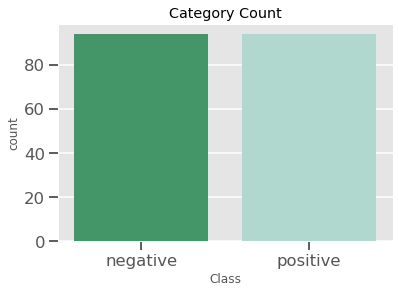

In [457]:
#Category count Plot
sns.countplot(data_df['Class'], palette='BuGn_r')
plt.title('Category Count')

In [458]:
#meta_df.dropna(axis=1,inplace=True)
meta_df.head()

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,2020,"Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [459]:
meta_df.groupby('view').count()

,Patientid,offset,sex,age,finding,survival,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
view,,,,,,,,,,,,,,,,
AP,10,7,10,10,10,3,10,10,9,10,3,10,0,9,6,0
AP Supine,10,9,10,10,10,6,10,10,10,10,3,10,0,10,7,0
Axial,20,12,16,16,20,6,20,20,16,20,10,20,4,20,10,0
Coronal,3,0,0,0,3,0,3,3,0,3,3,3,3,3,0,0
L,11,8,11,10,11,5,11,11,11,11,3,11,4,11,8,0
PA,92,72,80,75,92,39,92,92,67,92,54,92,26,87,39,1


In [460]:
meta_df.groupby('finding').count()


,Patientid,offset,sex,age,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
finding,,,,,,,,,,,,,,,,
ARDS,4,1,3,3,0,4,4,4,3,4,0,4,3,4,3,0
COVID-19,121,89,104,97,51,121,121,121,100,121,65,121,26,115,57,1
No Finding,2,2,2,2,0,2,2,2,2,2,0,2,0,2,2,0
Pneumocystis,2,0,2,2,0,2,2,2,2,2,0,2,2,2,2,0
SARS,11,11,11,11,8,11,11,11,0,11,11,11,0,11,0,0
Streptococcus,6,5,5,6,0,6,6,6,6,6,0,6,6,6,6,0


In [461]:
# extract only the rows with the "PA" view
covid_df = meta_df[lambda x: x['view'] == 'PA']
covid_df.head()

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,2020,"Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [462]:
# rename the finding column into "positive" (for covid-19) or "negative"(not covid-19) findings
covid_df['finding'] = covid_df['finding'].apply(lambda x:'positive' if x == 'COVID-19' else 'negative')
covid_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,positive,Y,PA,X-ray,2020,NaN,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
1,2,3.0,M,65.0,positive,Y,PA,X-ray,2020,NaN,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
2,2,5.0,M,65.0,positive,Y,PA,X-ray,2020,NaN,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
3,2,6.0,M,65.0,positive,Y,PA,X-ray,2020,NaN,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
4,4,0.0,F,52.0,positive,NaN,PA,X-ray,2020,"Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [463]:
# extract only the two relevant columns (finding, filename)
covid_df = covid_df[['finding', 'filename']]

In [464]:
covid_df.shape

(92, 2)

In [465]:
covid_df['finding'].unique()

array(['positive', 'negative'], dtype=object)

### Now we load the image, do some preprocessing (swap colors and resize) and then we append the load image into an image list, and the corresponding label into a its own list.

In [472]:
print("[INFO] loading images...")
train_data = []
train_labels = []
images=[]

# loop over image path list
for index,row in data_df.iterrows():
    #print(filename)
    #print(label)
    label=row[0]
    filename=row[1]
    img_path=filename
    #print(img_path)
    image = cv2.imread(img_path) #load image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #swap color channels
    image = cv2.resize(image, (224, 224)) #resize --ignoring aspect ratio
    # update lists 
    train_data.append(image)
    images.append((img_path, label))
    train_labels.append(label)

data = np.array(train_data) / 255.0 #convert data to numpy array & scale pixel intensity range to [0,1]
labels = np.array(labels) #convert label data to numpy array

[INFO] loading images...


In [473]:
train_labels[:5]#,data[0]

['negative', 'negative', 'negative', 'positive', 'negative']

In [474]:
# one-hot encoding on the labels
def one_hot_label_encoder(labels):
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    labels = to_categorical(labels)


    return labels,lb;

In [475]:
labels,lb = one_hot_label_encoder(train_labels)
labels.shape


(188, 2)

In [476]:
data.shape

(188, 224, 224, 3)

In [477]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# initialize the training image data augmentation object
train_aug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [478]:
trainX.shape, testY.shape

((150, 224, 224, 3), (38, 2))

In [479]:
# division helper to help plot subplots clearly
def ceildiv(a, b):
    return -(-a // b)
# plot function to display x-ray images passed given a tuple of image paths with a label
def plot_xray_imgs(img_tuple, figsize=(20,15), rows=1, sub_title=None, title=None):
    fig = plt.figure(figsize=figsize)
    if title is not None: plt.suptitle(title, fontsize=35)
    i=0
    for img in img_tuple:
        i+=1
        file=img[0]
        finding=img[1]
        sub_plot = fig.add_subplot(rows, ceildiv(len(img_tuple), rows), i+1)

        sub_plot.axis('Off')
        sub_plot.set_title(finding, fontsize=12)

        img = plt.imread(file)
        plt.imshow(img)

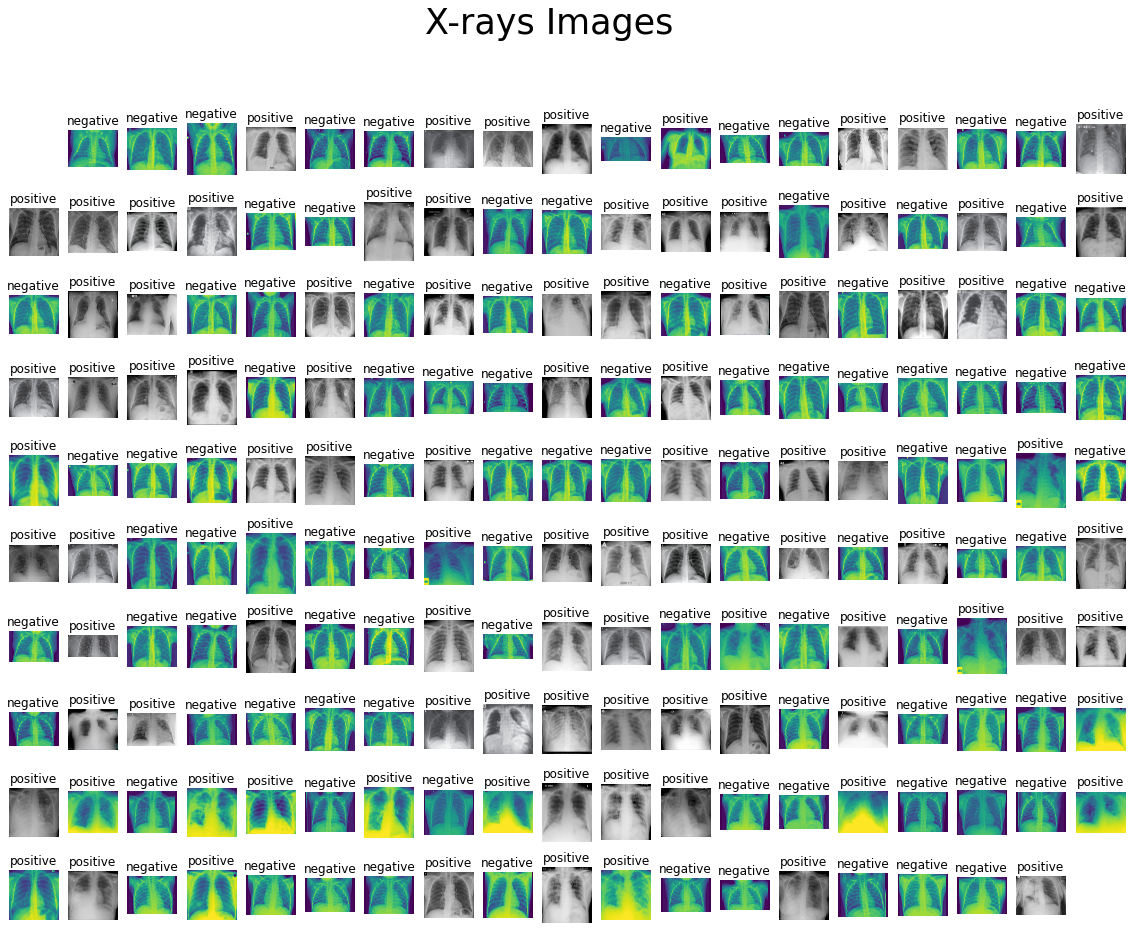

In [480]:
plot_xray_imgs(images, rows=10, title="X-rays Images")

In [481]:
# set hyperparameters
EPOCHS = 10
BATCH_SIZE = 8
BASE_LEARNING_RATE = 1e-3


In [501]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

### Model  

In [518]:

# load the VGG16 network
vgg16_model = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)) )
# construct a fully connected head model --will be placed on top of the the base VGG16 model
fc_model = vgg16_model.output
fc_model = MaxPooling2D(pool_size=(2, 2))(fc_model)
fc_model = Flatten(name="flatten")(fc_model)
fc_model = Dense(256, activation="relu")(fc_model)
fc_model = Dropout(0.5)(fc_model)
fc_model = Dense(2, activation="softmax")(fc_model)

# put the model together
model = Model(inputs=vgg16_model.input, outputs=fc_model)
# freeze layers in base model - therefore they won't be updated during the first training process
for layer in vgg16_model.layers:
    layer.trainable = False
    
#vgg16_model.summary()
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Train

In [519]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy') # saving best model while monitoring accuracy
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10) # help prevent overfitting



# compile the model 

print("[INFO] compiling model...")
opt = Adam(lr=BASE_LEARNING_RATE, decay=BASE_LEARNING_RATE / EPOCHS) #optmizer
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"]) #build model

# train the network
print("[INFO] training head...")
history = model.fit_generator(
    train_aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
    steps_per_epoch=len(trainX) // BATCH_SIZE,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BATCH_SIZE,
    epochs=EPOCHS, callbacks=[model_chkpt, early_stopping])

[INFO] compiling model...
[INFO] training head...
Train for 18 steps, validate on 38 samples
Epoch 1/10
18/18 [==============================] - 47s 3s/step - loss: 0.5172 - accuracy: 0.8169 - val_loss: 0.3178 - val_accuracy: 0.9062
Epoch 2/10
18/18 [==============================] - 47s 3s/step - loss: 0.1957 - accuracy: 0.9225 - val_loss: 0.5740 - val_accuracy: 0.8750
Epoch 3/10
18/18 [==============================] - 46s 3s/step - loss: 0.2504 - accuracy: 0.9225 - val_loss: 0.1184 - val_accuracy: 0.9062
Epoch 4/10
18/18 [==============================] - 51s 3s/step - loss: 0.0733 - accuracy: 0.9718 - val_loss: 0.1563 - val_accuracy: 0.9062
Epoch 5/10
18/18 [==============================] - 47s 3s/step - loss: 0.1043 - accuracy: 0.9648 - val_loss: 0.1143 - val_accuracy: 0.9688
Epoch 6/10
18/18 [==============================] - 46s 3s/step - loss: 0.0521 - accuracy: 0.9859 - val_loss: 0.1194 - val_accuracy: 0.9375
Epoch 7/10
18/18 [==============================] - 46s 3s/step - l

Text(0, 0.5, 'Error')

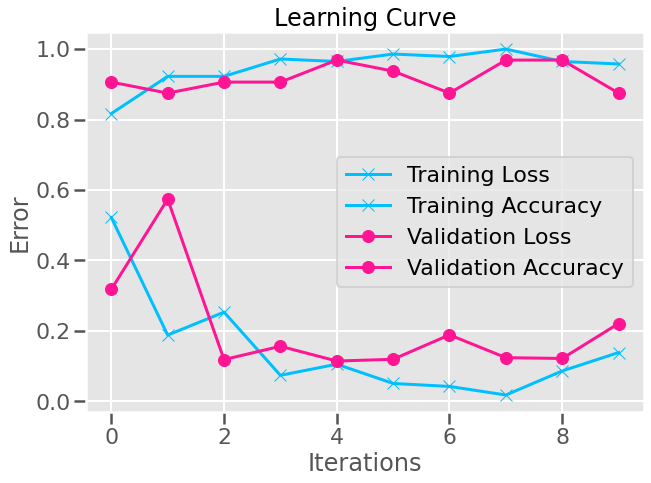

In [535]:
# plot learning curve over # of iterations

sns.set_context('poster')
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], 'b', label='Training Loss', marker='x', color='deepskyblue')
plt.plot(history.history["accuracy"], 'r', label='Training Accuracy', marker='x',color='deepskyblue')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss', marker='o',color='deeppink')
plt.plot(history.history["val_accuracy"], 'r', label='Validation Accuracy', marker='o',color='deeppink')

plt.legend()
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Error')

### Prediction

In [521]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predict = model.predict(testX, batch_size=BATCH_SIZE)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predict = np.argmax(predict, axis=1)


[INFO] evaluating network...


### Performace Evaluation

In [522]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predict, target_names=lb.classes_))



              precision    recall  f1-score   support

    negative       0.82      0.95      0.88        19
    positive       0.94      0.79      0.86        19

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



In [523]:
evaluation=model.evaluate(trainX,trainY)

150/150 [==============================] - 40s 264ms/sample - loss: 0.0355 - accuracy: 0.9933


In [525]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [543]:
print("Evaluation: \nAccuracy: {} \nLoss: {} \n".format(evaluation[1], evaluation[0]))


Evaluation: 
Accuracy: 0.9933333396911621 
Loss: 0.03545556699236234 



Text(0.5, 1.0, 'Confusion Matrix')

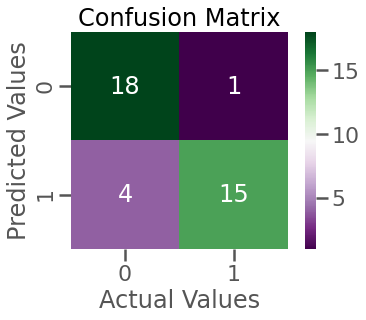

In [541]:
#plotting confusion matrix
sns.set_context('poster')
sns.heatmap(confusion_matrix(testY.argmax(axis=1),predict), annot=True, cmap='PRGn', square=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix')